# Examine Model Output

10/16/2019

Code for examining model output from the "frozen" run.

In [1]:
require('rstan')
require('tidyverse')

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.17.3, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ purrr   0.2.4
✔ tidyr   0.8.1     ✔ dplyr   0.7.4
✔ readr   1.1.1     ✔ stringr 1.3.0
✔ tibble  1.4.2     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks rstan::extract()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()


In [2]:
BIOMARKER_DIR <- "/scratch/PI/mrivas/users/erflynn/sex_div_gwas/data/biomarker"


## load M1 output

In [3]:
# load a particular trait - let's try WHR
trait <- "whr"
load(sprintf("%s/f_%s.RData", BIOMARKER_DIR, trait)) # --> fit1
load(sprintf("%s/dat_%s.RData", BIOMARKER_DIR, trait)) # --> dat

trait_summary <- read.delim(sprintf("%s/summary_dat_%s_2_.txt", BIOMARKER_DIR, trait),sep=" ")

# column names depend on the dimension
# t(c(trait, dat$dat$N, unlist(m1.pi), unlist(m1.Sigma), unlist(rg), unlist(rg.c$l), unlist(rg.c$u), unlist(h)))
# rg.l and rg.u are the 95% CI for rg
m1.cols <-  c("trait", "n", "pi[1]", "pi[2]", "Sigma[1,1]", "Sigma[1,2]", "Sigma[2,1]", "Sigma[2,2]", "rg", "rg.l", "rg.u", "h.f", "h.m")
colnames(trait_summary) <- m1.cols

In [13]:
trait_summary %>% head()
str(dat, 2)
str(fit1, 2)

trait,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg,rg.l,rg.u,h.f,h.m
whr,330090,0.6899581,0.3100419,3.871568e-05,2.551954e-05,2.551954e-05,2.997884e-05,0.7491182,0.731743,0.7668564,0.2109145,0.1717543


List of 3
 $ dat:List of 5
  ..$ N : int 330090
  ..$ M : int 2
  ..$ B : num [1:330090, 1:2] 0.00892 -0.0058 0.0075 0.00118 0.03992 ...
  ..$ SE: num [1:330090, 1:2] 7.27e-03 3.32e-05 2.80e-05 2.15e-04 8.80e-03 ...
  ..$ K : num 2
 $ snp: Named chr [1:330090] "rs115991721" "rs12562034" "rs4040617" "rs79373928" ...
  ..- attr(*, "names")= chr [1:330090] "rs115991721" "rs12562034" "rs4040617" "rs79373928" ...
 $ chr: Named chr [1:330090] "1" "1" "1" "1" ...
  ..- attr(*, "names")= chr [1:330090] "1" "1" "1" "1" ...
Formal class 'stanfit' [package "rstan"] with 10 slots
  ..@ model_name: chr "model1_no_loglik"
  ..@ model_pars: chr [1:7] "pi" "L_Omega" "tau" "Sigma" ...
  ..@ par_dims  :List of 7
  ..@ mode      : int 0
  ..@ sim       :List of 12
  ..@ inits     :List of 4
  ..@ stan_args :List of 4
  ..@ stanmodel :Formal class 'stanmodel' [package "rstan"] with 5 slots
  ..@ date      : chr "Thu Jun  6 02:15:15 2019"
  ..@ .MISC     :<environment: 0x963aeb8> 


In [4]:
# grab all the pi, rg, h values --> write to a csv
summary_file_list <- list.files(BIOMARKER_DIR, pattern=".txt$")
summary_df <- do.call(rbind, lapply(summary_file_list, function(x) {
    read.delim(sprintf("%s/%s", BIOMARKER_DIR, x), header=TRUE, sep=" ")}))
colnames(summary_df) <- m1.cols

list_traits <- read_csv("/scratch/PI/mrivas/users/erflynn/sex_div_gwas/data/ListPheCodes.csv")

summary_df2 <- right_join(list_traits, summary_df)
summary_df2 %>% head()

Parsed with column specification:
cols(
  trait = col_character(),
  category = col_character(),
  variable_name = col_character(),
  readable_name = col_character()
)
Joining, by = "trait"


trait,category,variable_name,readable_name,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg,rg.l,rg.u,h.f,h.m
21001,anthropometric traits,BMI,BMI,330093,0.6122799,0.387720076,3.554217e-05,3.594623e-05,3.594623e-05,3.900294e-05,0.9655049,0.9534735,0.9796680,0.2172363,0.2321698
30600,biomarker,Albumin,NA,329257,0.9081278,0.091872193,9.482733e-05,9.336865e-05,9.336865e-05,9.498615e-05,0.9838577,0.9696727,0.9964139,0.1278487,0.1375049
30610,biomarker,Alkaline phosphatase,NA,330011,0.9730553,0.026944659,6.440879e-04,7.865322e-04,7.865322e-04,9.831660e-04,0.9884096,0.9854120,0.9912018,0.1218310,0.1594359
30620,biomarker,Alanine aminotransferase,NA,329746,0.8947739,0.105226063,7.172421e-05,6.960079e-05,6.960079e-05,7.873114e-05,0.9262760,0.9077810,0.9433732,NA,NA
30630,biomarker,Apolipoprotein A,NA,329094,0.9582231,0.041776899,3.451655e-04,3.526252e-04,3.526252e-04,3.808396e-04,0.9726059,0.9654149,0.9790811,0.1216364,0.1351325
30640,biomarker,Apolipoprotein B,NA,329722,0.9919588,0.008041158,2.344222e-03,2.028669e-03,2.028669e-03,1.809115e-03,0.9851004,0.9816250,0.9880179,0.1419184,0.1100582


In [27]:
write_csv(summary_df2, "/scratch/PI/mrivas/users/erflynn/sex_div_gwas/data/m1_output_10_06.csv")

In [6]:
# read in error bars
err_bar_list <- list.files(sprintf("%s/herit/", BIOMARKER_DIR), pattern=".txt$")
err_bars <- do.call(rbind, lapply(err_bar_list, function(x) {
    read.delim(sprintf("%s/herit/%s",BIOMARKER_DIR, x), header=FALSE, sep=" ")}))
colnames(err_bars) <- c("trait", "int_type", "h_type", "val")
err_bars <- err_bars %>% filter(!is.na(val)) 
err_bars %>% head()

trait,int_type,h_type,val
Albumin,up,hf,0.128502190797067
Albumin,low,hf,0.111511078152825
Albumin,up,hm,0.134750333073872
Albumin,low,hm,0.116944620884415
Alkaline_phosphatase,up,hf,0.133720470569383
Alkaline_phosphatase,low,hf,0.116185487713306


In [7]:
summary_h <- summary_df2 %>% 
rename("hf"="h.f", "hm"="h.m") %>%
select(category, variable_name, readable_name, hf, hm) %>% 
gather(key="h_type", value="val", hf, hm) %>%
mutate(int_type="mid") %>%
mutate(trait=ifelse(is.na(readable_name), gsub(" ", "\\_", variable_name), readable_name))


summary_h %>% head()


category,variable_name,readable_name,h_type,val,int_type,trait
anthropometric traits,BMI,BMI,hf,0.2172363,mid,BMI
biomarker,Albumin,NA,hf,0.1278487,mid,Albumin
biomarker,Alkaline phosphatase,NA,hf,0.1218310,mid,Alkaline_phosphatase
biomarker,Alanine aminotransferase,NA,hf,NA,mid,Alanine_aminotransferase
biomarker,Apolipoprotein A,NA,hf,0.1216364,mid,Apolipoprotein_A
biomarker,Apolipoprotein B,NA,hf,0.1419184,mid,Apolipoprotein_B


In [11]:
?dcast()

In [24]:
combined_dat <- rbind(err_bars, summary_h %>% select("trait", "int_type", "h_type", "val")) %>% 
mutate(val=as.numeric(val)) %>% filter(!is.na(int_type))



Warning message in evalq(as.numeric(val), <environment>):
“NAs introduced by coercion”

In [25]:
combined_dat %>% head()

require('reshape2')
combined_dat2 <- dcast(combined_dat, trait + h_type ~ int_type, mean, value.var="val")
combined_dat2 %>% head()

trait,int_type,h_type,val
Albumin,up,hf,0.1285022
Albumin,low,hf,0.1115111
Albumin,up,hm,0.1347503
Albumin,low,hm,0.1169446
Alkaline_phosphatase,up,hf,0.1337205
Alkaline_phosphatase,low,hf,0.1161855


trait,h_type,low,up,mid
Alanine_aminotransferase,hf,NaN,NaN,NA
Alanine_aminotransferase,hm,NaN,NaN,NA
Albumin,hf,0.1115111,0.1285022,0.1278487
Albumin,hm,0.1169446,0.1347503,0.1375049
Alkaline_phosphatase,hf,0.1161855,0.1337205,0.1218310
Alkaline_phosphatase,hm,0.1473314,0.1695028,0.1594359


Warning message:
“Removed 14 rows containing missing values (geom_bar).”Warning message:
“Removed 30 rows containing missing values (geom_errorbar).”

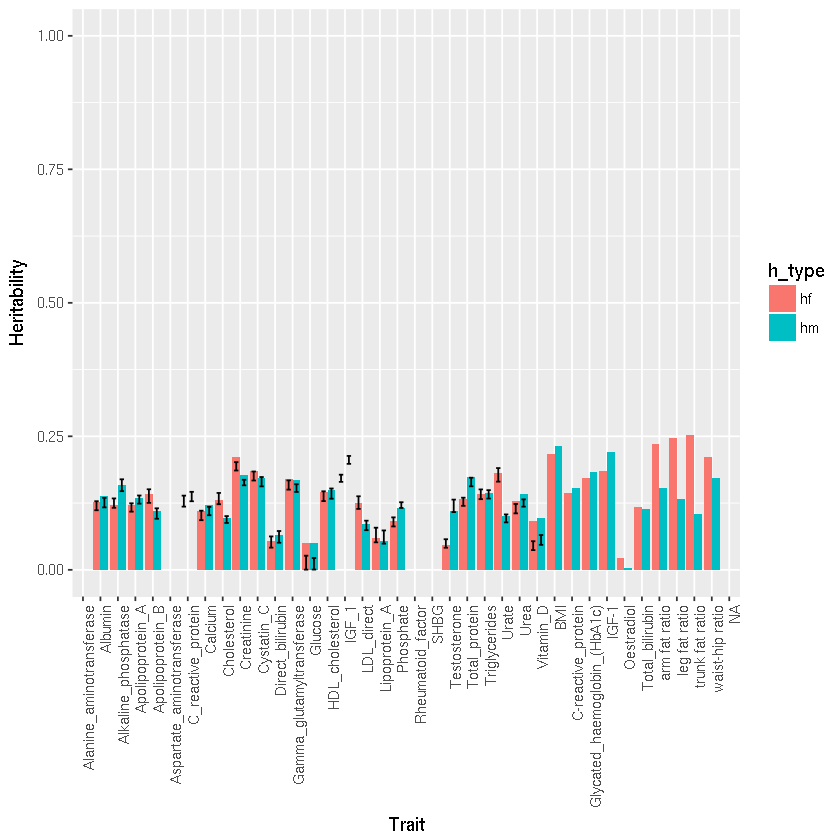

In [26]:
#heritability plot
ggplot(data=combined_dat2, aes(x=trait, y=mid, fill=h_type))+
geom_bar(stat="identity", position=position_dodge())+
geom_errorbar(aes(ymin=low, ymax=up), position=position_dodge(0.9), color="black", width=0.5) + 
theme(axis.text.x=element_text(angle=90,hjust=1)) +ylab("Heritability")+xlab("Trait") 
facet_grid(. ~ category,  scales="free", space="free")



## load M2 output

In [31]:
# load a particular trait
load(sprintf("%s/m2/f_m2_%s.RData", BIOMARKER_DIR, trait)) # --> fit2
load(sprintf("%s/m2/dat_%s.RData", BIOMARKER_DIR, trait)) # --> dat
str(fit2,2)
str(dat,2)

Formal class 'stanfit' [package "rstan"] with 10 slots
  ..@ model_name: chr "model2"
  ..@ model_pars: chr [1:7] "pi" "sigmasq" "Sigma" "a" ...
  ..@ par_dims  :List of 7
  ..@ mode      : int 0
  ..@ sim       :List of 12
  ..@ inits     :List of 4
  ..@ stan_args :List of 4
  ..@ stanmodel :Formal class 'stanmodel' [package "rstan"] with 5 slots
  ..@ date      : chr "Wed Jun  5 09:33:20 2019"
  ..@ .MISC     :<environment: 0x144f2d78> 
List of 3
 $ dat:List of 5
  ..$ N : int 330090
  ..$ M : int 2
  ..$ B : num [1:330090, 1:2] 0.00892 -0.0058 0.0075 0.00118 0.03992 ...
  ..$ SE: num [1:330090, 1:2] 7.27e-03 3.32e-05 2.80e-05 2.15e-04 8.80e-03 ...
  ..$ K : num 4
 $ snp: Named chr [1:330090] "rs115991721" "rs12562034" "rs4040617" "rs79373928" ...
  ..- attr(*, "names")= chr [1:330090] "rs115991721" "rs12562034" "rs4040617" "rs79373928" ...
 $ chr: Named chr [1:330090] "1" "1" "1" "1" ...
  ..- attr(*, "names")= chr [1:330090] "1" "1" "1" "1" ...


In [33]:
snp_tab <- read.delim(sprintf("%s/m2/snp_table_%s.txt", BIOMARKER_DIR, trait), sep=" ")

In [34]:
snp_tab %>% head()

p1,p2,p3,p4,category,SNP
0.9985514,9.079257e-05,1.316094e-07,1.357635e-03,1,rs115991721
0.9997258,1.015015e-05,9.637125e-08,2.639836e-04,1,rs12562034
0.9999540,1.533586e-05,7.317822e-09,3.067382e-05,1,rs4040617
0.9998536,1.561317e-05,3.201489e-08,1.307959e-04,1,rs79373928
0.9980572,1.085985e-04,2.340372e-07,1.834009e-03,1,rs59771807
0.9988991,1.301999e-04,3.312901e-08,9.706451e-04,1,rs116452738
